<a href="https://colab.research.google.com/github/sametgirgin/FinanceNotebooks/blob/main/financial_data_module_1_lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### MODULE 1 | LESSON 3
# GOVERNMENT BOND YIELD CURVE ANALYSIS

|  |  |
|:---|:---|
|**Reading Time** 60 minutes |   |
|**Prior Knowledge** U.S. Treasury Bonds, Yield Curve, Linear Algebra, Basic Python |   |
|**Keywords** Bond price-yield curve, Risk free interest rate, Nelson Siegel, Cubic Spline|  |

---

*In the previous lesson, we learned how to obtain U.S. Treasury yield information and went through some foundational concepts about yield curve. In this lesson, we are going to dive deeper and learn how to fit a bond yield curve. We will continue to use U.S. Treasury yield data for demonstration.*

## **1. Risk-Free Interest Rates**

In the Financial Markets course, we learned about credit risk with investing in bonds. Credit risk, which is assumed by the bond investor, is the risk that the bond issuer will default on the bond. An entity with a high credit rating or credit score can borrow money from financial markets at a lower interest rate compared to an entity with a lower credit rating. In the U.S., government-issued bonds (U.S. Treasuries or Treasuries) are usually considered high credit rating bonds. Therefore, Treasury yields are usually used as **risk-free rates** for bond price evaluations in the financial industry. There are a lot of debates about whether U.S. Treasuries are actually safe with no risk of default. Different scenarios will need different considerations. In this lesson, we'll follow current financial market convention by using U.S. Treasury yields as risk-free rates.
<br>
<br>
Another key concept in credit risk is credit spread. **Credit spread** or **credit premium** is the interest rate difference between a corporate bond and a government bond of the same maturity. This interest rate difference is also called **excess return** of the corporate bond since the government bond yield is risk-free interest. The excess return of the corporate bond is the additional return to a corporate bond holder to take on additional risk in holding this corporate bond.
<br>
<br>
Since risk-free interest rates are a key element not only in bond pricing but also in other financial asset pricing and portfolio management, it is crucial to understand the characteristics and behavior of risk-free interest. In this lesson, we will use U.S. treasury (or treasuries) yields as risk-free interest to investigate their behavior and conduct analysis.
<br>
<br>
## **2. Volatility of U.S. Treasury Yields**
First, let's take a look of the volatilities of Treasury yields of different maturities. We continue from Lesson 2's method to get Treasury yield data from FRED using Python as follows.

In [2]:
! pip install fredapi

In [3]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
# Initialize the FRED API with your key
fred = Fred(api_key='**') # Replace my APIKEY with "YOUR_API_KEY" #https://fred.stlouisfed.org/docs/api/fred/

# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1975-01-01", observation_end="2024-05-03")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', \
                  '7 Year', '10 Year', '20 Year', '30 Year']

In [9]:
yields

,1 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
1975-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-02,NaN,NaN,NaN,7.27,NaN,7.34,7.34,7.34,7.42,7.94,NaN
1975-01-03,NaN,NaN,NaN,7.19,NaN,7.33,7.36,7.36,7.43,7.92,NaN
1975-01-06,NaN,NaN,NaN,7.10,NaN,7.29,7.34,7.33,7.39,7.89,NaN
1975-01-07,NaN,NaN,NaN,7.00,NaN,7.26,7.35,7.34,7.38,7.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29,5.48,5.45,5.43,5.20,4.97,4.80,4.65,4.64,4.63,4.86,4.75
2024-04-30,5.48,5.46,5.44,5.25,5.04,4.87,4.72,4.71,4.69,4.90,4.79
2024-05-01,5.47,5.46,5.43,5.21,4.96,4.79,4.64,4.64,4.63,4.85,4.74
2024-05-02,5.51,5.46,5.42,5.16,4.87,4.71,4.57,4.57,4.58,4.82,4.72


In [10]:
yields.index = pd.to_datetime(yields.index)

In [11]:
yields

,1 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
1975-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-02,NaN,NaN,NaN,7.27,NaN,7.34,7.34,7.34,7.42,7.94,NaN
1975-01-03,NaN,NaN,NaN,7.19,NaN,7.33,7.36,7.36,7.43,7.92,NaN
1975-01-06,NaN,NaN,NaN,7.10,NaN,7.29,7.34,7.33,7.39,7.89,NaN
1975-01-07,NaN,NaN,NaN,7.00,NaN,7.26,7.35,7.34,7.38,7.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29,5.48,5.45,5.43,5.20,4.97,4.80,4.65,4.64,4.63,4.86,4.75
2024-04-30,5.48,5.46,5.44,5.25,5.04,4.87,4.72,4.71,4.69,4.90,4.79
2024-05-01,5.47,5.46,5.43,5.21,4.96,4.79,4.64,4.64,4.63,4.85,4.74
2024-05-02,5.51,5.46,5.42,5.16,4.87,4.71,4.57,4.57,4.58,4.82,4.72


Now let's calculate the standard deviations of Treasury yields of different maturities. Then, we'll draw a graph to present the standard deviations by maturity.

In [12]:
yields = yields.dropna()
y_std = yields.std()
y_std

,0
1 Month,1.705851
3 Month,1.733347
6 Month,1.746829
1 Year,1.684091
2 Year,1.545413
3 Year,1.446639
5 Year,1.309345
7 Year,1.226457
10 Year,1.174092
20 Year,1.206514


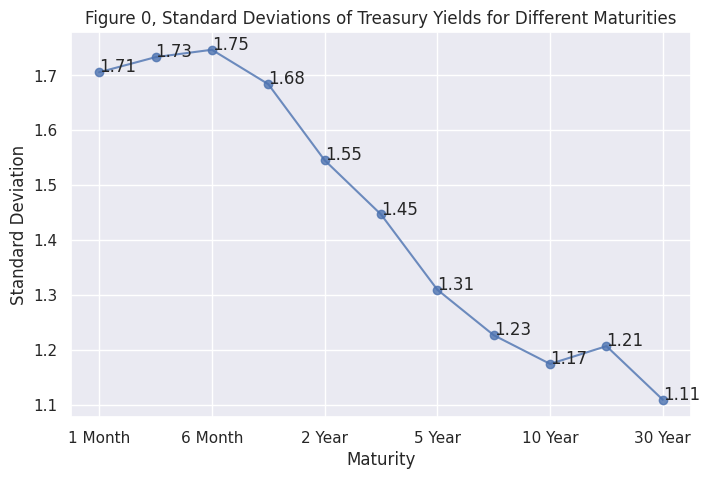

In [13]:
fig, ax = plt.subplots()
y_std.plot(figsize = (8,5),marker='o', title='Figure 0, Standard Deviations of Treasury Yields for Different Maturities', alpha=0.8) # Plot standard deviations of yields of different maturies
plt.xlabel("Maturity")
plt.ylabel("Standard Deviation")
for i in range(len(y_std)):
    ax.annotate(str(round(y_std.iloc[i],2)),xy=(i,y_std.iloc[i]))
plt.show()

From the above graph, we see that the standard deviations of U.S. Treasury bonds with short maturities are higher than the U.S. Treasury bonds with longer maturities. The standard deviations for Treasury bonds with maturities of less than one year stay high above 1.7. Then, the standard deviations of Treasury bonds with maturities over one year decrease steadily.
<br>
<br>
## **3. Treasury Bond Price-Yield Curve**
According to the bond price mathematical formula, the relationship between bond price and bond yield is non-linear. This relationship is best explained with a bond price-yield curve. Let's use the following figure to demonstrate the relationship.
<br>
<br>
**Figure 1: Bond Price-Yield Curve**
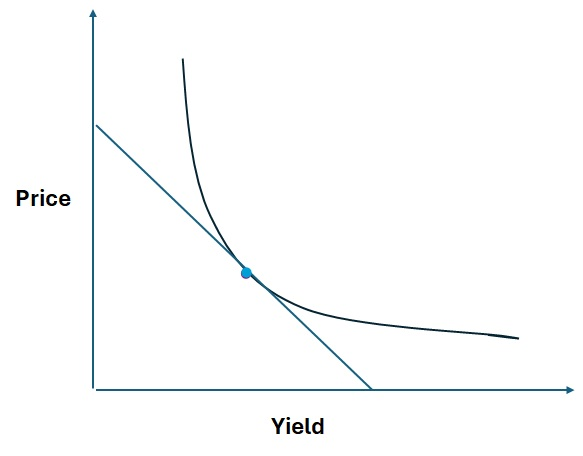


[Graph showing price vs. yield with a line intersecting a curve at a marked point]
<br>
<br>
In Figure 1, we can see that when the yield/interest of a bond increases, the price of the bond will decrease. Conversely, when the yield/interest of a bond decreases, the price of the bond will increase. There is a negative relationship between the bond price and bond yields. However, when yield changes by one unit, the price change varies depending on where the yield level is when yield change happens.
<br>
This is another key point to pay attention to in the bond price-yield relationship: the bond price and bond yield do not have a linear relationship; they have a convex relationship. This non-linear relationship between bond price and bond yield has an important implication in interest rate risk management for bond investment. Let's use the following Figure 2 to explain the concept.
<br>
<br>
**Figure 2: Non-Linear Relationship between Bond Price and Bond Yield**

![Graph showing price vs. yield with two rectangles (D1, D2) illustrating changes in price (P1, P2) along a downward-sloping curve]

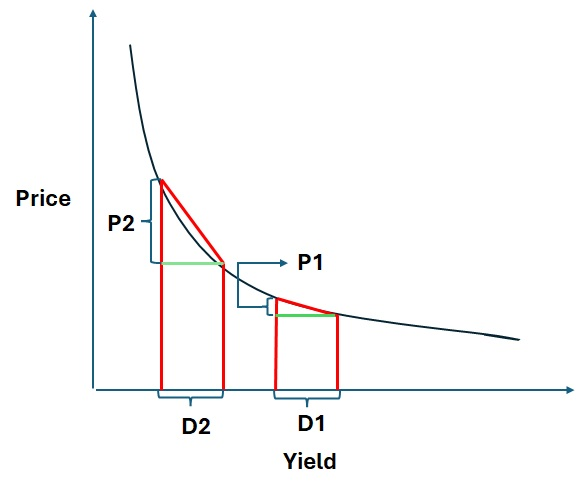


<br>
<br>
Based on the convex nature of the bond price-yield curve depicted in Figure 2, the amount of price change when yield changes by the same amount varies depending on yield level. In Figure 2, D1 and D2 have the same length. When the yield changes by D1, the amount of price change is P1. When the yield changes by D2, the amount of price change is P2. However, the yield level for D1 is higher than the yield level for D2. Because of the convexity of the price yield curve, P1 is smaller than P2.
<br>
The feature of this relationship between bond price and bond yield is called **curvature**. The example above demonstrates that the slope of the price-yield curve changes when the level of the yield changes. The curvature of the price-yield curve is used to describe this slope dependency on yield level. A bond portfolio manager will have to pay attention to the curvatures of the bond holdings when managing interest rate risk.


##**4. Polynomial Fitting for U.S. Treasury Yield Curve**
We talked about U.S. Treasury yield curve in the previous lesson. Yield curve describes the relationship of bond yield and time to maturity (or maturity) of similar bonds. This relationship is also called the **term structure** of a yield curve. Analyzing term structure is critical in bond pricing and interest rate risk management. In this section, we will introduce methods to fit a yield curve. We will continue to use U.S. Treasury bond yields as an example. First, let's make a graph for the U.S. Treasury yield curve on 2020 January 10th.

Figure 3


/tmp/ipython-input-1226209266.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


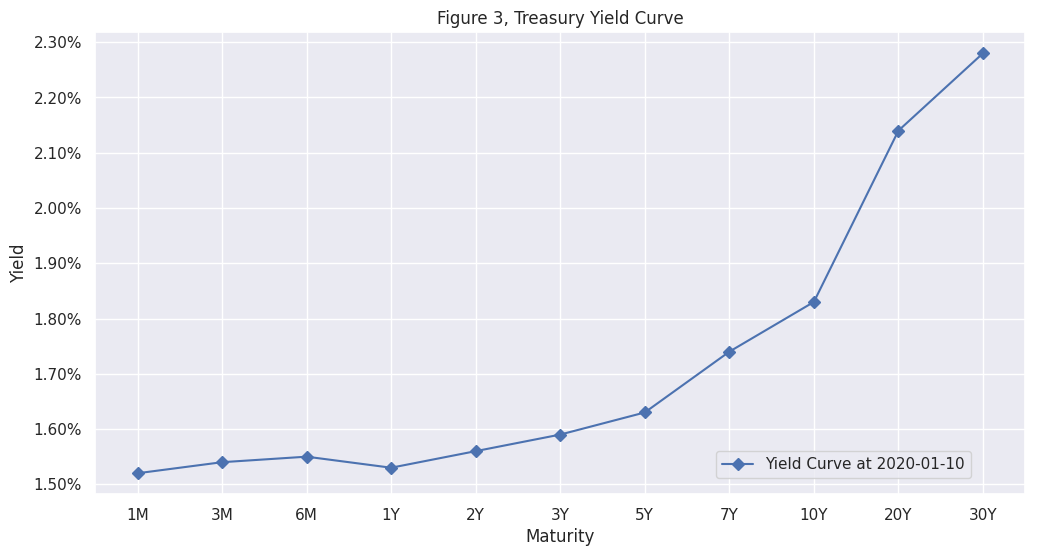

In [15]:
def plot_yield_curve(date, fig_n):
    maturities = ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y'] # Maturities
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, yields.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title(fig_n+'Treasury Yield Curve')


    fig.legend(loc = [0.69, 0.14])

    # Show the plot
    plt.grid(True)
    plt.show()

print("Figure 3")
plot_yield_curve('2020-01-10','Figure 3, ')


In this section, we are going to use a polynomial fitting technique to estimate a yield curve.
<br>
**Polynomial fitting** is when a researcher uses the nth degree of input variable polynomials to predict the output variable. For example, if the input variable is $x$ and the output variable is $y$, the following expression is to use the nth degree of $x$ polynomials to predict $y$.
<br>
*$$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x^{2}+\beta_{3}x^{3}...+\beta_{n}x^{n}$$*
<br>
$\beta_{0},\beta_{1},\beta_{2},\beta_{3},...,\beta_{n}$ are parameters to be estimated.
<br>
<br>
There are several polynomial fitting methods to fit a yield curve. In this lesson, we are going to learn two methods: the **Nelson Siegel model** and **cubic spline fitting**.
<br>
<br>
### **4.1 Nelson Siegel Model**
The **Nelson Siegel model (NS model)** is a popular model for describing the relationship between maturity and yield (Svensson). Here is the formula for the model:

$$y(t)=\beta_{0}+\beta_{1}\left( \frac{1-e^{-\lambda t}}{\lambda t} \right)+\beta_{2}\left( \frac{1-e^{^{-\lambda t}}}{\lambda t}-e^{-\lambda t} \right)+\epsilon$$
<br>
$\beta_{0},\beta_{1},\beta_{2}$ are the parameters to be estimated. $t$ is the time to maturity and $\lambda$ is the decay rate. The decay rate is between 0 and 1. $\beta_{0}$ is used to describe the level of the yield curve. $\beta_{1}$ is used to describe the slope of the yield curve and $\beta_{2}$ is used to describe the shape of the yield curve. For this reason, we also call the NS model a **yield curve factor model**. The NS model decomposes the yield curve into three elements as described above.
<br>
How does the decay rate work? The smaller the decay rate, the slower the curve decays. The larger the decay rate, the faster the curve decays. The decay rate shows how fast the yield will converge to the long-term average.
<br>
With the NS model's simple structure, we can use different elements in the model to describe different yield curve behaviors. Once we have an estimated NS model, we can use the model to predict the action of future interest rate moves (Pape).
<br>
Let's use the Nelson Siegel Sevensson package from Python to demonstrate the NS model.
<br>
<br>
### **4.2 Nelson Siegel Model: Python Demonstration**
In this section, we are going to use the Nelson Siegel Sevensson package from Python to show how to fit a yield curve. First, we need to install and import the package.

In [16]:
!pip install nelson_siegel_svensson

In [17]:
# Import the packages for fitting NS model
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np

After importing the necessary packages for fitting the NS model, we need to create variables for modeling. We first need to create a maturity variable $t$ in terms of year. For example, 1 month is 0.08333 year and 3-month is 0.25 year. The next variable is the yield variable. Both maturity variable and yield variable need to be in an array form. We are going to use the yields from 2020 January 10th (2020-01-10) as our example since we just drew the yield curve on that day in the last section.

In [18]:
# Create maturity and yield variables in array form
t = np.array([0.08333,0.25,0.5,1,2,3,5,7,10,20,30])
y = np.array(yields.loc["2020-01-10"])

Once the variables are ready, we can move to estimate the NS model.

In [19]:
# Fit an NS model for yields from 2020-01-10
curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=np.float64(2.6376805704948407), beta1=np.float64(-1.1025856119805097), beta2=np.float64(-1.1406474347407198), tau=np.float64(4.750013241604026))


The NS model result shows the estimated $\beta_{0}$, $\beta_{1}$, $\beta_{2}$, and decay rate. Now let's plot the graph to better understand the model result.

Text(0.5, 1.0, 'Figure 4, NS Model Result')

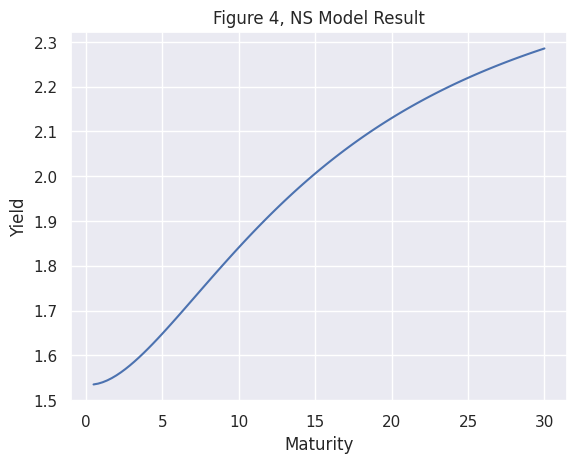

In [20]:
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 4, NS Model Result")

From the above Figure 4, we can see the estimated yield curve is a pretty good fit of the curve chart we drew in the previous section. Let's estimate a different shape of yield curve. This time, we'll use the yields from 2006 March 23rd (2006-03-23). First, let's draw the yield data from 2006-03-23.

/tmp/ipython-input-1226209266.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


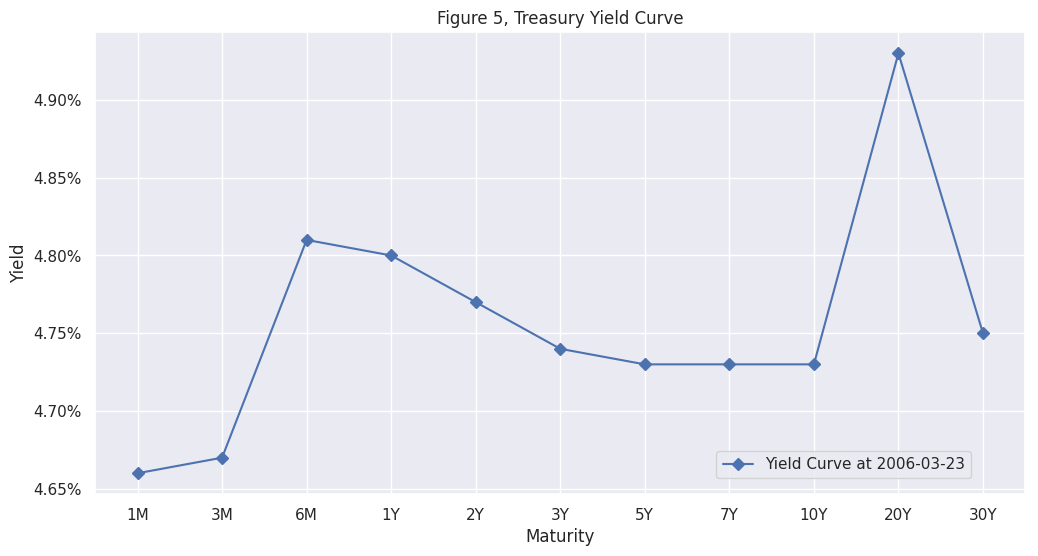

In [21]:
plot_yield_curve('2006-03-23','Figure 5, ')


In Figure 5, the yields from 6-month maturity to 10-year maturity demonstrate a downward slope shape, which is different from the yield curve at 2020-01-10. Let's see if the NS model will pick this up. We'll repeat the same process to model the yield curve on 2006-03-23.

In [22]:
y = np.array(yields.loc["2006-03-23"])
curve, status = calibrate_ns_ols(t, y, tau0=0.5)  # starting value of 0.5 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=np.float64(4.769301547213251), beta1=np.float64(-0.186085682255706), beta2=np.float64(0.2593711683729586), tau=np.float64(0.25704894665261885))


Text(0.5, 1.0, 'Figure 6, NS Model Result')

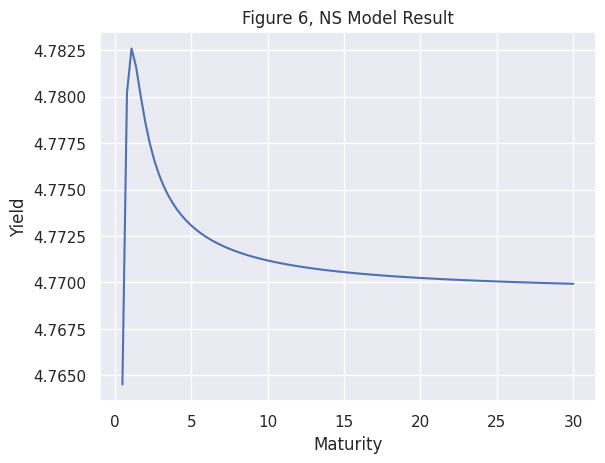

In [24]:
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 6, NS Model Result")

From the above Figure 6, we can see that the curve slopes downward after one year of maturity. This result is consistent with Figure 5, which we drew earlier.

## **5. Cubic Spline Fitting of Yield Curve**
In this section, we are going to introduce another popular method to fit a yield curve with data. It is called **cubic spline**. Spline fitting is a method under polynomial fitting. Please read the required reading "Spine Method of Interpolation" to study the theory of spline fitting, especially cubic spline fitting. We'll use the cubic spline fitting method in Python to fit a yield curve in the next section. Please be advised that in Lesson 4 "Application of Quadratic Spline Interpolation", there is a mistake in the note. In the big matrix presentation, the coefficient vector should be on the left-hand side of the equation, not the right-hand side.
<br>
<br>
### **5.1 Python Application: Use Cubic Spline Fitting to Fit a Yield Curve**
In this section, we'll demonstrate how to fit a yield curve cubic spline. For ease of demonstration, we will only use yields from 2-year, 5-year, 10-year, and 30-year Treasury bonds on 2020-01-10 as an example. Let's check the yields on 2020-01-10 first.

In [25]:
yields.loc["2020-01-10"]

,2020-01-10
1 Month,1.52
3 Month,1.54
6 Month,1.55
1 Year,1.53
2 Year,1.56
3 Year,1.59
5 Year,1.63
7 Year,1.74
10 Year,1.83
20 Year,2.14


Let's define our maturity variable and yield variable as array forms.

In [26]:
t = np.array([2,5,10,30])
y = np.array([1.56,1.63,1.83,2.28])

Now, let's write out the cubic spline equations first. Since we have 4 paired data points, there will be 3 splines.
<br>
<br>
$$f\left( x \right)=a_{1}x^{3}+b_{1}x^{2}+c_{1}x+d_{1}, \text{when }2\le x\le 5$$
$$f\left( x \right)=a_{2}x^{3}+b_{2}x^{2}+c_{2}x+d_{2}, \text{when }5\le x\le 10$$
$$f\left( x \right)=a_{3}x^{3}+b_{3}x^{2}+c_{3}x+d_{3}, \text{when }10\le x\le 30$$
<br>
<br>
From the above equations, we have 12 unknowns. Hence, we need 12 equations to solve for the 12 parameters. Let's write out the equations that each cubic spline function would go through at two consecutive data points.
<br>
<br>
$$a_{1}(2)^{3}+b_{1}(2)^{2}+c_{1}(2)+d_{1}=1.56\;\;\;(1)$$
$$a_{1}(5)^{3}+b_{1}(5)^{2}+c_{1}(5)+d_{1}=1.63\;\;\;(2)$$
<br>
<br>
$$a_{2}(5)^{3}+b_{2}(5)^{2}+c_{2}(5)+d_{2}=1.63\;\;\;(3)$$
$$a_{2}(10)^{3}+b_{2}(10)^{2}+c_{2}(10)+d_{2}=1.83\;\;\;(4)$$
<br>
<br>
$$a_{3}(10)^{3}+b_{3}(10)^{2}+c_{3}(10)+d_{3}=1.83\;\;\;(5)$$
$$a_{3}(30)^{3}+b_{3}(30)^{2}+c_{3}(30)+d_{3}=2.28\;\;\;(6)$$
<br>
<br>
Now, let's write down the equations that show the first derivatives of two consecutive cubic splines being continuous at the common interior points.
<br>
<br>
$$3a_{1}(5)^{2}+2b_{1}(5)+c_{1}=3a_{2}(5)^{2}+2b_{2}(5)+c_{2}\;\;\;(7)$$
$$3a_{2}(10)^{2}+2b_{2}(10)+c_{2}=3a_{3}(10)^{2}+2b_{3}(10)+c_{3}\;\;\;(8)$$
<br>
<br>
And then we'll write the equations that show the second derivatives of two consecutive cubic splines being continuous at the common interior points.
<br>
<br>
$$6a_{1}(5)+2b_{1}=6a_{2}(5)+2b_{2}\;\;\;(9)$$
$$6a_{2}(10)+2b_{2}=6a_{3}(10)+2b_{3}\;\;\;(10)$$
<br>
<br>
The last two equations are boundary conditions. We set the second derivatives of the cubic splines at the end points to be zeroes.
<br>
<br>
$$6a_{1}(2)+2b_{1}=0\;\;\;(11)$$
$$6a_{3}(30)+2b_{3}=0\;\;\;(12)$$
<br>
<br>
Now we have 12 equations to solve for 12 parameters. We can write the whole problem as a big matrix equation.
<br>
<br>
$$\begin{bmatrix}
8 & 4 & 2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
125 & 25 & 5 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 125 & 25 & 5 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 1000 & 100 & 10 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1000 & 100 & 10 & 1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 27000 & 900 & 30 & 1 \\
 75 & 10 & 1 & 0 & -75 & -10 & -1 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 300 & 20 & 1 & 0 & -300 & -20 & -1 & 0 \\
 30 & 2 & 0 & 0 & -30 & -2 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 60 & 2 & 0 & 0 & -60 & -2 & 0 & 0 \\
 12 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 180 & 2 & 0 & 0
\end{bmatrix}\bullet\begin{bmatrix}
a_{1} \\
b_{1} \\
c_{1} \\
d_{1} \\
a_{2} \\
b_{2} \\
c_{2} \\
d_{2} \\
a_{3} \\
b_{3} \\
c_{3} \\
d_{3}
\end{bmatrix}=\begin{bmatrix}
1.56 \\
1.63 \\
1.63 \\
1.83 \\
1.83 \\
2.28 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}$$
<br>
<br>
We can write the above matrix equation as the following equation:
<br>
<br>
$$A\bullet c=y$$
<br>
<br>
$A$ is the squared matrix. $c$ is the coefficient vector and $y$ is the output vector. In order to solve for $c$, we will use the following linear algebra rule.
<br>
<br>
$$c=A^{-1}\bullet y$$
<br>
<br>
$A^{-1}$ is the inverse of the squared matrix. The following Python code is used to solve for the coefficient vector.

In [27]:
# Create output vector y (out variable) and squared matrix A (input variable)
out = np.array([1.56,1.63,1.63,1.83,1.83,2.28,0,0,0,0,0,0])
input = np.array([[8,4,2,1,0,0,0,0,0,0,0,0],[125,25,5,1,0,0,0,0,0,0,0,0],[0,0,0,0,125,25,5,1,0,0,0,0],[0,0,0,0,1000,100,10,1,0,0,0,0], \
                  [0,0,0,0,0,0,0,0,1000,100,10,1],[0,0,0,0,0,0,0,0,27000,900,30,1],[75,10,1,0,-75,-10,-1,0,0,0,0,0],[0,0,0,0,300,20,1,0,-300,-20,-1,0], \
                  [30,2,0,0,-30,-2,0,0,0,0,0,0],[0,0,0,0,60,2,0,0,-60,-2,0,0],[12,2,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,180,2,0,0]])

In [28]:
# Solve for coefficient vector and reshape to an 3 by 4 array (lines variable)
# Make sure to give enough decimals since all coefficients are relatively small. If there is not decimal points, the following coefficient results and graphs will be rough
lines = np.round(np.dot(np.linalg.inv(input), out).reshape(-1,4),decimals=8)
lines

array([[ 3.96060000e-04, -2.37634000e-03,  2.45215100e-02,
         1.51729391e+00],
       [-3.31400000e-04,  8.53548000e-03, -3.00376300e-02,
         1.60822581e+00],
       [ 2.34400000e-05, -2.10968000e-03,  7.64139800e-02,
         1.25338710e+00]])

From the above result, we can see the coefficients are presented as a 3 X 4 array.
<br>
<br>
$$\begin{bmatrix}
a_{1} & b_{1} & c_{1} & d_{1} \\
a_{2} & b_{2} & c_{2} & d_{2}  \\
a_{3} & b_{3} & c_{3} & d_{3}
\end{bmatrix}$$
<br>
<br>
Now we can draw a smooth curve from maturity 2 to maturity 30 using Python.

In [29]:
# Calculates x**0 + x**1 + x**2 + x**3
def plot_num(values, coeffs):
    # Coeffs are assumed to be in order 0, 1, ..., n-1
    expanded = np.hstack([coeffs[i] * (values ** i) for i in range(0, len(coeffs))])
    return np.sum(expanded, axis=1)


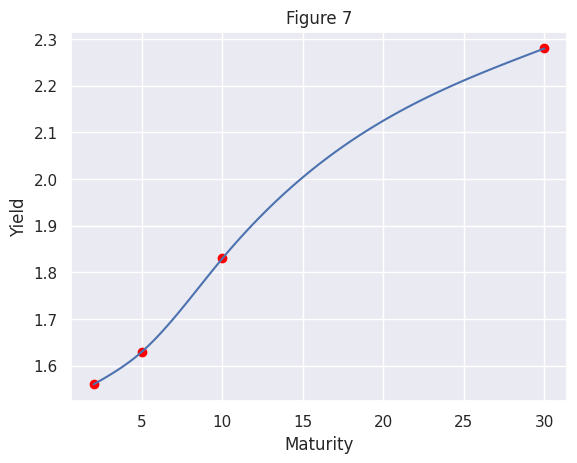

In [30]:
# Simulate the 100 paired data points and draw the graph
xs = np.linspace(2,30, 100)

y1s = plot_num(xs[xs<5].reshape(-1,1), lines[0][::-1])
y2s = plot_num(xs[(xs>=5) & (xs<10)].reshape(-1,1), lines[1][::-1])
y3s = plot_num(xs[xs>=10].reshape(-1,1), lines[2][::-1])
ys = np.concatenate([y1s, y2s, y3s])


plt.plot(xs, ys)
plt.scatter(t, y,c="red")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 7")
plt.show()


The above Figure 7 shows the estimated yield curve on 2020-01-10 using the cubic spline fitting method. We can see with the cubic spline that the line between two data points is not a straight line but a curve. With this estimated curve, we can calculate the yield for any maturity occurring on this curve for bond pricing or other yield analyses.
<br>
Once we build this yield curve, we can use this curve to obtain discount factors for any future cash flows. Summing all the discounted future cash flows from an asset, we can get the present value of the asset and evaluate whether the current price is overvaluing or undervaluing the asset.


## **6. Conclusion**

In this lesson, we first learned what the risk-free rate is. Then, we calculated the volatility of U.S. Treasury bonds of different maturities. We also learned two methods of fitting a yield curve using the Nelson Siegel method and cubic spline method. We finished with a demonstration of how to implement these two methods to fit a U.S. Treasury yield curve in Python.

**References**
<br>
* Pape. "Understanding the Nelson-Siegel-Svensson (NSS) Model for Bond Yield Curve Analysis." Medium, 2024 May 12. https://medium.com/@pape14/understanding-the-nelson-siegel-svensson-nss-model-for-bond-yield-curve-analysis-2a23202cbf6b.

* Svensson, Lars. "Estimating and Interpreting Forward Interest Rates: Sweden 1992-1994." *NBER Working Paper Series*, no. 4871, 1994.
<br>

Copyright 2024 WorldQuant University. This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.